In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm

__author__ = 'salikhovakariya'

In [2]:
values = []
with open("c1.txt") as f:
    for line in f:
        items = line.split()
        values.append(items)
c1 = np.array(values, dtype=int)

values = []
with open("c2.txt") as f:
    for line in f:
        items = line.split()
        values.append(items)
c2 = np.array(values, dtype=int)

In [3]:
c1.shape

(1000000, 10)

### CTR 

In [4]:
def calc_t_CTR(data1, data2):
    n = data1.shape[0] # = data2.shape[0]
    k = 1000
    values1 = []
    values2 = []
    for i in range(n // k):
        sample1 = data1[k*i:k*(i+1), :]
        values1.append(np.sum(np.any(sample1, axis=1))/k)
        
        sample2 = data2[k*i:k*(i+1), :]
        values2.append(np.sum(np.any(sample2, axis=1))/k)
    #std = np.sqrt((np.var(values1))/len(values1) + (np.var(values2))/len(values2))
    #t = (np.mean(values2) - np.mean(values1)) / std
    return stats.ttest_ind(values2, values1) 

In [5]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, data.shape[0], n_samples)
    samples = data[indices, :]
    return samples

In [6]:
N = 1000
n1 = c1.shape[0]
n2 = c2.shape[0]
t0 = 1.96
calc_CTR = 0
t_list_CTR = []
for i in range(N):
    sample1 = get_bootstrap_samples(c1, n1)
    sample2 = get_bootstrap_samples(c2, n2)
    t = calc_t_CTR(sample1, sample2)
    t_list_CTR.append(t[0])
    if t[0] > t0 or t[0] < t0:
        calc_CTR += 1
asl_CTR = calc_CTR / N

In [7]:
asl_CTR

1.0

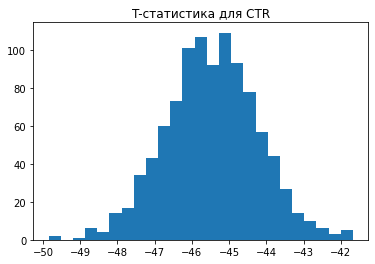

In [16]:
plt.hist(t_list_CTR, bins=25)
plt.title('T-статистика для CTR')
plt.show()

### Mean Reciprocal Rank

In [9]:
def calc_t_MRR(data1, data2):
    n = data1.shape[0] # = data2.shape[0]
    k = 1000
    values1 = []
    values2 = []
    for i in range(n // k):
        sample1 = data1[k*i:k*(i+1), :]
        sample2 = data2[k*i:k*(i+1), :]
        pos_list1 = np.sum(1*(np.cumsum(sample1, axis=1)==0), axis=1)
        sum1 = np.sum([1/(x+1) if x < 10 else 0 for x in pos_list1])
        pos_list2 = np.sum(1*(np.cumsum(sample2, axis=1)==0), axis=1)
        sum2 = np.sum([1/(x+1) if x < 10 else 0 for x in pos_list2])
        values1.append(sum1/k)     
        values2.append(sum2/k)
    return stats.ttest_ind(values2, values1) 

In [11]:
N = 1000
n1 = c1.shape[0]
n2 = c2.shape[0]
t0 = 1.96
calc_MRR = 0
t_list_MRR = []
for i in tqdm(range(N)):
    sample1 = get_bootstrap_samples(c1, n1)
    sample2 = get_bootstrap_samples(c2, n2)
    t = calc_t_MRR(sample1, sample2)
    t_list_MRR.append(t[0])
    if t[0] > t0 or t[0] < t0:
        calc_MRR += 1
asl_MRR = calc_MRR/N

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [33:08<00:00,  1.99s/it]


In [12]:
asl_MRR

1.0

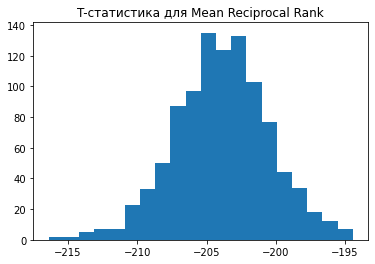

In [14]:
plt.hist(t_list_MRR, bins=20)
plt.title('T-статистика для Mean Reciprocal Rank')
plt.show()

### Вывод:
Как можно увидеть по гистограммам, значения t-статистик для обеих метрик получились отрицательными, причем t < -1.96 для всех t. И, если я правильно уловила суть, это значит, что ___первый сплит лучше___ (так как статистика рассчитывалась по формуле t = (np.mean(values2) - np.mean(values1)) / std)